# Principal Component Analysis

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io

plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams.update({'font.size': 14})


## Gaussian Dataset

#### Creating a Gaussian Dataset

In [6]:
# Mean of data
xC = np.array([2, 1]) 

# Principal axes
sig = np.array([2, 0.5])

# Rotation angle
theta = np.pi/3    

# Rotation matrix
R = np.array([[np.cos(theta), -np.sin(theta)],   
              [np.sin(theta), np.cos(theta)]])

# Generate data
nPoints = 10000      
X = R @ np.diag(sig) @ np.random.randn(2, nPoints) + \
    np.diag(xC) @ np.ones((2, nPoints))


#### PCA

In [7]:

## Normalization of the Data
Xavg = np.mean(X,axis=1)                 
B = X - np.tile(Xavg,(nPoints,1)).T   

# Find principal components (SVD)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints),full_matrices=0)

#### Plot the results of the PCA analysis

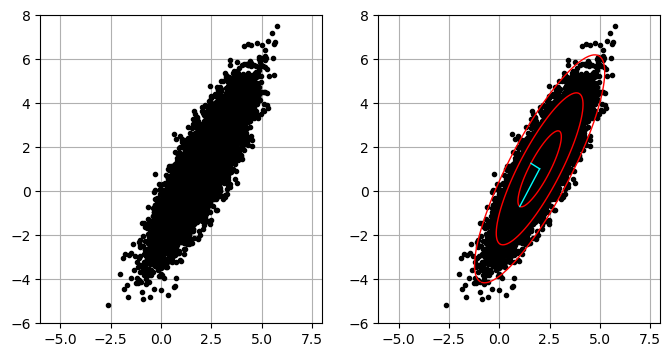

In [9]:

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:],X[1,:], '.', color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))


ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', color='k') 
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

theta = 2 * np.pi * np.arange(0,1,0.01)

# 1-std confidence interval
Xstd = U @ np.diag(S) @ np.array([np.cos(theta),np.sin(theta)])

ax2.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:],'-',color='r',linewidth=1)
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'-',color='r',linewidth=1)
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'-',color='r',linewidth=1)

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]), np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]),'-',color='cyan',linewidth=1)
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]), np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]),'-',color='cyan',linewidth=1)

plt.show()

## Ovarian Cancer Dataset

#### Load the Dataset

In [13]:
obs = np.loadtxt(os.path.join('Data', 'ovariancancer_obs.csv'), delimiter=',')

f = open(os.path.join('Data', 'ovariancancer_grp.csv'), "r")
grp = f.read().split("\n")

#### PCA

In [14]:
U, S, VT = np.linalg.svd(obs, full_matrices=0)

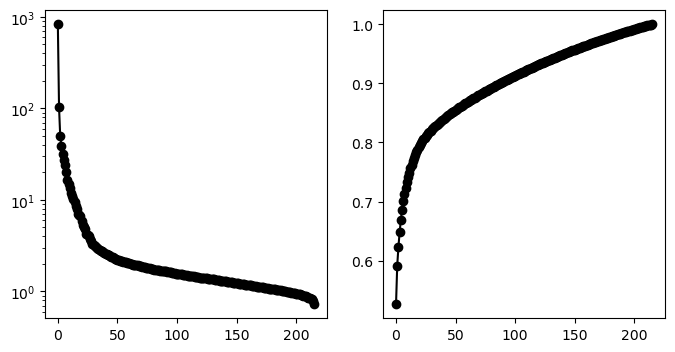

In [15]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S, '-o', color='k')
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S), '-o', color='k')

plt.show()

## Eigenfaces

#### Load the Dataset

In [18]:
mat_contents = scipy.io.loadmat(os.path.join('Data', 'allFaces.mat'))
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])


In [20]:
allPersons = np.zeros((n*6, m*6))
count = 0

for j in range(6):
    for k in range(6):
        allPersons[j*n: (j+1)*n, k*m: (k+1)*m] = np.reshape(faces[:,np.sum(nfaces[:count])], (m, n)).T
        count += 1


#### Visualize the Dataset

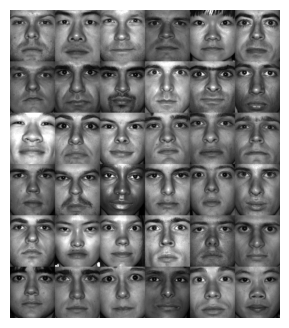

In [23]:
img = plt.imshow(allPersons)
img.set_cmap('gray')
plt.axis('off')
plt.show()


#### Compute the Eigenfaces

In [26]:
trainingFaces = faces[:, :np.sum(nfaces[:36])]
avgFace = np.mean(trainingFaces, axis=1)

# Compute eigenfaces on mean-subtracted training data
X = trainingFaces - np.tile(avgFace, (trainingFaces.shape[1], 1)).T
U, S, VT = np.linalg.svd(X, full_matrices=0)


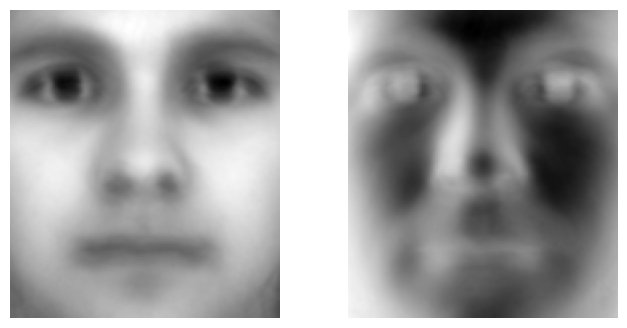

In [27]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avgFace, (m, n)).T)
img_avg.set_cmap('gray')
plt.axis('off')

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(U[:, 0], (m, n)).T)
img_u1.set_cmap('gray')
plt.axis('off')

plt.show()

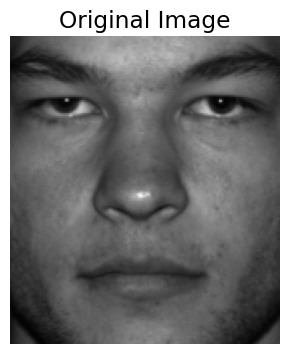

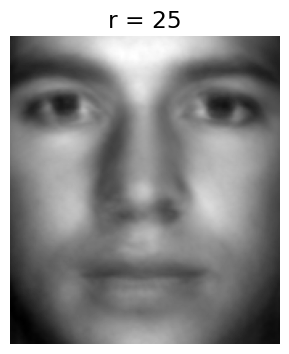

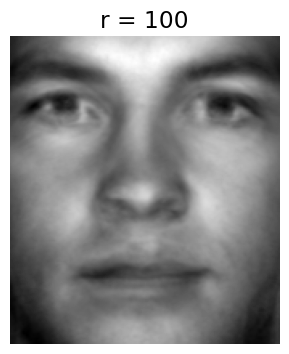

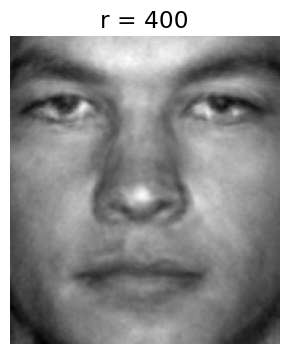

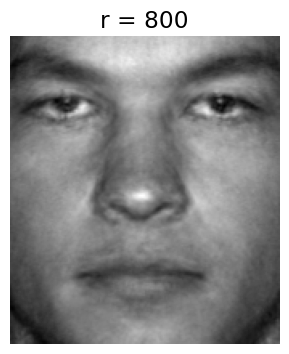

In [30]:
# Now show eigenface reconstruction of image that was omitted from test set

testFace = faces[:, np.sum(nfaces[:36])]  # First face of person 37
plt.imshow(np.reshape(testFace, (m, n)).T)
plt.set_cmap('gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

testFaceMS = testFace - avgFace
r_list = [25, 100, 400, 800]

for r in r_list:
    reconFace = avgFace + U[:, :r]  @ U[:, :r].T @ testFaceMS
    img = plt.imshow(np.reshape(reconFace, (m, n)).T)
    img.set_cmap('gray')
    plt.title('r = ' + str(r))
    plt.axis('off')
    plt.show()


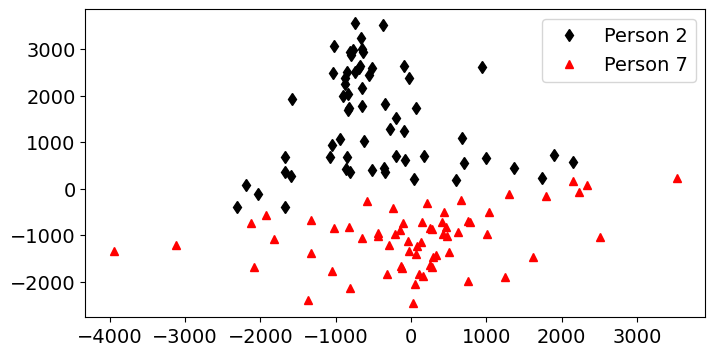

In [32]:
## Project person 2 and 7 onto PC5 and PC6

P1num = 2 # Person number 2
P2num = 7 # Person number 7

P1 = faces[:,np.sum(nfaces[:(P1num-1)]):np.sum(nfaces[:P1num])]
P2 = faces[:,np.sum(nfaces[:(P2num-1)]):np.sum(nfaces[:P2num])]

P1 = P1 - np.tile(avgFace,(P1.shape[1],1)).T
P2 = P2 - np.tile(avgFace,(P2.shape[1],1)).T

PCAmodes = [5, 6] # Project onto PCA modes 5 and 6
PCACoordsP1 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P1
PCACoordsP2 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P2

plt.plot(PCACoordsP1[0,:],PCACoordsP1[1,:],'d',color='k',label='Person 2')
plt.plot(PCACoordsP2[0,:],PCACoordsP2[1,:],'^',color='r',label='Person 7')

plt.legend()
plt.show()